In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [5]:
x=data.drop(['label'], axis=1)
y=data['label']

In [6]:
x.columns

Index(['X_rms', 'X_std', 'Y_min', 'Y_max', 'Y_range', 'Y_rms', 'Y_std',
       'Z_min', 'Z_max', 'Z_range', 'Z_rms', 'Z_std', 'X_jerk_rms',
       'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range', 'Y_jerk_rms',
       'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range', 'Z_jerk_rms',
       'Z_jerk_std', 'total_jerk_min', 'total_jerk_max', 'total_jerk_range',
       'total_jerk_rms', 'total_jerk_std'],
      dtype='object')

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 29), (1121, 29))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 29), (169, 29))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2025-05-05 23:21:02.772526: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 23:21:02.773020: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 23:21:02.775189: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 23:21:02.781290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746465662.791590   42015 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746465662.79

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

2025-05-05 23:21:03.740804: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [14]:
model.compile(optimizer=SGD(learning_rate=lr_schedule, 
                            momentum=0.97, 
                            nesterov=True),  # Enable Nesterov momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# model.compile(optimizer=Adam(learning_rate=lr_schedule), 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                                epochs=800,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/800
41/41 - 1s - 18ms/step - accuracy: 0.2177 - loss: 1.9250 - val_accuracy: 0.2447 - val_loss: 1.8432
Epoch 2/800
41/41 - 0s - 2ms/step - accuracy: 0.3007 - loss: 1.7606 - val_accuracy: 0.3393 - val_loss: 1.7197
Epoch 3/800
41/41 - 0s - 2ms/step - accuracy: 0.3539 - loss: 1.6509 - val_accuracy: 0.3477 - val_loss: 1.5848
Epoch 4/800
41/41 - 0s - 2ms/step - accuracy: 0.3730 - loss: 1.5682 - val_accuracy: 0.4023 - val_loss: 1.5225
Epoch 5/800
41/41 - 0s - 2ms/step - accuracy: 0.3971 - loss: 1.5274 - val_accuracy: 0.4055 - val_loss: 1.4685
Epoch 6/800
41/41 - 0s - 2ms/step - accuracy: 0.4311 - loss: 1.4621 - val_accuracy: 0.4265 - val_loss: 1.4261
Epoch 7/800
41/41 - 0s - 2ms/step - accuracy: 0.4675 - loss: 1.3988 - val_accuracy: 0.4548 - val_loss: 1.3640
Epoch 8/800
41/41 - 0s - 2ms/step - accuracy: 0.4759 - loss: 1.3551 - val_accuracy: 0.4874 - val_loss: 1.3030
Epoch 9/800
41/41 - 0s - 2ms/step - accuracy: 0.5050 - loss: 1.3220 - val_accuracy: 0.5137 - val_loss: 1.2676
Epoch 10/

Epoch 68/800
41/41 - 0s - loss: 0.8450 - accuracy: 0.6859 - val_loss: 0.9202 - val_accuracy: 0.6849 - 56ms/epoch - 1ms/step
Epoch 69/800
41/41 - 0s - loss: 0.8622 - accuracy: 0.6725 - val_loss: 0.9473 - val_accuracy: 0.6660 - 55ms/epoch - 1ms/step
Epoch 70/800
41/41 - 0s - loss: 0.8397 - accuracy: 0.6867 - val_loss: 0.9179 - val_accuracy: 0.6838 - 56ms/epoch - 1ms/step
Epoch 71/800
41/41 - 0s - loss: 0.8050 - accuracy: 0.6978 - val_loss: 0.9228 - val_accuracy: 0.6723 - 55ms/epoch - 1ms/step
Epoch 72/800
41/41 - 0s - loss: 0.8299 - accuracy: 0.6970 - val_loss: 0.9055 - val_accuracy: 0.6807 - 55ms/epoch - 1ms/step
Epoch 73/800
41/41 - 0s - loss: 0.8268 - accuracy: 0.6959 - val_loss: 0.9161 - val_accuracy: 0.6807 - 55ms/epoch - 1ms/step
Epoch 74/800
41/41 - 0s - loss: 0.8088 - accuracy: 0.6905 - val_loss: 0.8936 - val_accuracy: 0.6964 - 55ms/epoch - 1ms/step
Epoch 75/800
41/41 - 0s - loss: 0.8203 - accuracy: 0.6970 - val_loss: 0.9335 - val_accuracy: 0.6754 - 55ms/epoch - 1ms/step
Epoch 76

Epoch 134/800
41/41 - 0s - loss: 0.6252 - accuracy: 0.7743 - val_loss: 0.8307 - val_accuracy: 0.7374 - 56ms/epoch - 1ms/step
Epoch 135/800
41/41 - 0s - loss: 0.6269 - accuracy: 0.7697 - val_loss: 0.8310 - val_accuracy: 0.7416 - 57ms/epoch - 1ms/step
Epoch 136/800
41/41 - 0s - loss: 0.6450 - accuracy: 0.7590 - val_loss: 0.8821 - val_accuracy: 0.7227 - 57ms/epoch - 1ms/step
Epoch 137/800
41/41 - 0s - loss: 0.6524 - accuracy: 0.7655 - val_loss: 0.8694 - val_accuracy: 0.7132 - 57ms/epoch - 1ms/step
Epoch 138/800
41/41 - 0s - loss: 0.6292 - accuracy: 0.7678 - val_loss: 0.8403 - val_accuracy: 0.7374 - 57ms/epoch - 1ms/step
Epoch 139/800
41/41 - 0s - loss: 0.6763 - accuracy: 0.7578 - val_loss: 0.8359 - val_accuracy: 0.7300 - 56ms/epoch - 1ms/step
Epoch 140/800
41/41 - 0s - loss: 0.6417 - accuracy: 0.7609 - val_loss: 0.8418 - val_accuracy: 0.7248 - 56ms/epoch - 1ms/step
Epoch 141/800
41/41 - 0s - loss: 0.6322 - accuracy: 0.7605 - val_loss: 0.8862 - val_accuracy: 0.7216 - 56ms/epoch - 1ms/step


Epoch 200/800
41/41 - 0s - loss: 0.5225 - accuracy: 0.8037 - val_loss: 0.8276 - val_accuracy: 0.7458 - 56ms/epoch - 1ms/step
Epoch 201/800
41/41 - 0s - loss: 0.5570 - accuracy: 0.7972 - val_loss: 0.8371 - val_accuracy: 0.7374 - 55ms/epoch - 1ms/step
Epoch 202/800
41/41 - 0s - loss: 0.5337 - accuracy: 0.8030 - val_loss: 0.7928 - val_accuracy: 0.7511 - 55ms/epoch - 1ms/step
Epoch 203/800
41/41 - 0s - loss: 0.5494 - accuracy: 0.7995 - val_loss: 0.7806 - val_accuracy: 0.7721 - 55ms/epoch - 1ms/step
Epoch 204/800
41/41 - 0s - loss: 0.5129 - accuracy: 0.8106 - val_loss: 0.7990 - val_accuracy: 0.7458 - 57ms/epoch - 1ms/step
Epoch 205/800
41/41 - 0s - loss: 0.5135 - accuracy: 0.8125 - val_loss: 0.7814 - val_accuracy: 0.7616 - 56ms/epoch - 1ms/step
Epoch 206/800
41/41 - 0s - loss: 0.5387 - accuracy: 0.8041 - val_loss: 0.7974 - val_accuracy: 0.7489 - 57ms/epoch - 1ms/step
Epoch 207/800
41/41 - 0s - loss: 0.5380 - accuracy: 0.8041 - val_loss: 0.7898 - val_accuracy: 0.7458 - 60ms/epoch - 1ms/step


Epoch 266/800
41/41 - 0s - loss: 0.5070 - accuracy: 0.8148 - val_loss: 0.7933 - val_accuracy: 0.7532 - 56ms/epoch - 1ms/step
Epoch 267/800
41/41 - 0s - loss: 0.4740 - accuracy: 0.8290 - val_loss: 0.8096 - val_accuracy: 0.7584 - 57ms/epoch - 1ms/step
Epoch 268/800
41/41 - 0s - loss: 0.4583 - accuracy: 0.8321 - val_loss: 0.8438 - val_accuracy: 0.7489 - 56ms/epoch - 1ms/step
Epoch 269/800
41/41 - 0s - loss: 0.4706 - accuracy: 0.8321 - val_loss: 0.8212 - val_accuracy: 0.7668 - 56ms/epoch - 1ms/step
Epoch 270/800
41/41 - 0s - loss: 0.4255 - accuracy: 0.8462 - val_loss: 0.8239 - val_accuracy: 0.7647 - 56ms/epoch - 1ms/step
Epoch 271/800
41/41 - 0s - loss: 0.4441 - accuracy: 0.8347 - val_loss: 0.8529 - val_accuracy: 0.7468 - 56ms/epoch - 1ms/step
Epoch 272/800
41/41 - 0s - loss: 0.4672 - accuracy: 0.8351 - val_loss: 0.8658 - val_accuracy: 0.7584 - 57ms/epoch - 1ms/step
Epoch 273/800
41/41 - 0s - loss: 0.4824 - accuracy: 0.8279 - val_loss: 0.8475 - val_accuracy: 0.7511 - 56ms/epoch - 1ms/step


Epoch 332/800
41/41 - 0s - loss: 0.4445 - accuracy: 0.8485 - val_loss: 0.8263 - val_accuracy: 0.7637 - 57ms/epoch - 1ms/step
Epoch 333/800
41/41 - 0s - loss: 0.4414 - accuracy: 0.8409 - val_loss: 0.8217 - val_accuracy: 0.7689 - 56ms/epoch - 1ms/step
Epoch 334/800
41/41 - 0s - loss: 0.4035 - accuracy: 0.8611 - val_loss: 0.8510 - val_accuracy: 0.7521 - 56ms/epoch - 1ms/step
Epoch 335/800
41/41 - 0s - loss: 0.4086 - accuracy: 0.8577 - val_loss: 0.8429 - val_accuracy: 0.7626 - 56ms/epoch - 1ms/step
Epoch 336/800
41/41 - 0s - loss: 0.4111 - accuracy: 0.8573 - val_loss: 0.8154 - val_accuracy: 0.7626 - 56ms/epoch - 1ms/step
Epoch 337/800
41/41 - 0s - loss: 0.4061 - accuracy: 0.8516 - val_loss: 0.8487 - val_accuracy: 0.7521 - 55ms/epoch - 1ms/step
Epoch 338/800
41/41 - 0s - loss: 0.3957 - accuracy: 0.8577 - val_loss: 0.8440 - val_accuracy: 0.7773 - 56ms/epoch - 1ms/step
Epoch 339/800
41/41 - 0s - loss: 0.3947 - accuracy: 0.8623 - val_loss: 0.8599 - val_accuracy: 0.7658 - 56ms/epoch - 1ms/step


Epoch 398/800
41/41 - 0s - loss: 0.4067 - accuracy: 0.8512 - val_loss: 0.8611 - val_accuracy: 0.7595 - 56ms/epoch - 1ms/step
Epoch 399/800
41/41 - 0s - loss: 0.3764 - accuracy: 0.8619 - val_loss: 0.8455 - val_accuracy: 0.7710 - 56ms/epoch - 1ms/step
Epoch 400/800
41/41 - 0s - loss: 0.3842 - accuracy: 0.8577 - val_loss: 0.8397 - val_accuracy: 0.7647 - 56ms/epoch - 1ms/step
Epoch 401/800
41/41 - 0s - loss: 0.3904 - accuracy: 0.8600 - val_loss: 0.8329 - val_accuracy: 0.7700 - 57ms/epoch - 1ms/step
Epoch 402/800
41/41 - 0s - loss: 0.3814 - accuracy: 0.8619 - val_loss: 0.8546 - val_accuracy: 0.7658 - 57ms/epoch - 1ms/step
Epoch 403/800
41/41 - 0s - loss: 0.3714 - accuracy: 0.8627 - val_loss: 0.8450 - val_accuracy: 0.7721 - 56ms/epoch - 1ms/step
Epoch 404/800
41/41 - 0s - loss: 0.3796 - accuracy: 0.8730 - val_loss: 0.8324 - val_accuracy: 0.7721 - 57ms/epoch - 1ms/step
Epoch 405/800
41/41 - 0s - loss: 0.3657 - accuracy: 0.8596 - val_loss: 0.8532 - val_accuracy: 0.7658 - 57ms/epoch - 1ms/step


Epoch 464/800
41/41 - 0s - loss: 0.3433 - accuracy: 0.8753 - val_loss: 0.8968 - val_accuracy: 0.7637 - 56ms/epoch - 1ms/step
Epoch 465/800
41/41 - 0s - loss: 0.3285 - accuracy: 0.8837 - val_loss: 0.8965 - val_accuracy: 0.7836 - 55ms/epoch - 1ms/step
Epoch 466/800
41/41 - 0s - loss: 0.3199 - accuracy: 0.8849 - val_loss: 0.9050 - val_accuracy: 0.7679 - 55ms/epoch - 1ms/step
Epoch 467/800
41/41 - 0s - loss: 0.3514 - accuracy: 0.8761 - val_loss: 0.9294 - val_accuracy: 0.7742 - 56ms/epoch - 1ms/step
Epoch 468/800
41/41 - 0s - loss: 0.3313 - accuracy: 0.8707 - val_loss: 0.9129 - val_accuracy: 0.7700 - 56ms/epoch - 1ms/step
Epoch 469/800
41/41 - 0s - loss: 0.3491 - accuracy: 0.8799 - val_loss: 0.9055 - val_accuracy: 0.7647 - 55ms/epoch - 1ms/step
Epoch 470/800
41/41 - 0s - loss: 0.3099 - accuracy: 0.8898 - val_loss: 0.8832 - val_accuracy: 0.7805 - 56ms/epoch - 1ms/step
Epoch 471/800
41/41 - 0s - loss: 0.3501 - accuracy: 0.8768 - val_loss: 0.8760 - val_accuracy: 0.7679 - 55ms/epoch - 1ms/step


Epoch 530/800
41/41 - 0s - loss: 0.2956 - accuracy: 0.9009 - val_loss: 0.8970 - val_accuracy: 0.7689 - 56ms/epoch - 1ms/step
Epoch 531/800
41/41 - 0s - loss: 0.3089 - accuracy: 0.8887 - val_loss: 0.9142 - val_accuracy: 0.7878 - 56ms/epoch - 1ms/step
Epoch 532/800
41/41 - 0s - loss: 0.3267 - accuracy: 0.8849 - val_loss: 0.8974 - val_accuracy: 0.7826 - 56ms/epoch - 1ms/step
Epoch 533/800
41/41 - 0s - loss: 0.3032 - accuracy: 0.8894 - val_loss: 0.8989 - val_accuracy: 0.7700 - 56ms/epoch - 1ms/step
Epoch 534/800
41/41 - 0s - loss: 0.2953 - accuracy: 0.8944 - val_loss: 0.9094 - val_accuracy: 0.7710 - 56ms/epoch - 1ms/step
Epoch 535/800
41/41 - 0s - loss: 0.3101 - accuracy: 0.8894 - val_loss: 0.9029 - val_accuracy: 0.7805 - 55ms/epoch - 1ms/step
Epoch 536/800
41/41 - 0s - loss: 0.3011 - accuracy: 0.8914 - val_loss: 0.8797 - val_accuracy: 0.7805 - 56ms/epoch - 1ms/step
Epoch 537/800
41/41 - 0s - loss: 0.3282 - accuracy: 0.8871 - val_loss: 0.9182 - val_accuracy: 0.7763 - 57ms/epoch - 1ms/step


Epoch 596/800
41/41 - 0s - loss: 0.2826 - accuracy: 0.8967 - val_loss: 0.9034 - val_accuracy: 0.7752 - 56ms/epoch - 1ms/step
Epoch 597/800
41/41 - 0s - loss: 0.3061 - accuracy: 0.8925 - val_loss: 0.9010 - val_accuracy: 0.7815 - 56ms/epoch - 1ms/step
Epoch 598/800
41/41 - 0s - loss: 0.2824 - accuracy: 0.9047 - val_loss: 0.9028 - val_accuracy: 0.7815 - 57ms/epoch - 1ms/step
Epoch 599/800
41/41 - 0s - loss: 0.2946 - accuracy: 0.8975 - val_loss: 0.9063 - val_accuracy: 0.7836 - 57ms/epoch - 1ms/step
Epoch 600/800
41/41 - 0s - loss: 0.2857 - accuracy: 0.8929 - val_loss: 0.9110 - val_accuracy: 0.7826 - 56ms/epoch - 1ms/step
Epoch 601/800
41/41 - 0s - loss: 0.3040 - accuracy: 0.8914 - val_loss: 0.8775 - val_accuracy: 0.7994 - 56ms/epoch - 1ms/step
Epoch 602/800
41/41 - 0s - loss: 0.2676 - accuracy: 0.9032 - val_loss: 0.9082 - val_accuracy: 0.7868 - 57ms/epoch - 1ms/step
Epoch 603/800
41/41 - 0s - loss: 0.2934 - accuracy: 0.8929 - val_loss: 0.9161 - val_accuracy: 0.7784 - 57ms/epoch - 1ms/step


Epoch 662/800
41/41 - 0s - loss: 0.2648 - accuracy: 0.9051 - val_loss: 0.9370 - val_accuracy: 0.7826 - 55ms/epoch - 1ms/step
Epoch 663/800
41/41 - 0s - loss: 0.2824 - accuracy: 0.9002 - val_loss: 0.9414 - val_accuracy: 0.7815 - 55ms/epoch - 1ms/step
Epoch 664/800
41/41 - 0s - loss: 0.2614 - accuracy: 0.9044 - val_loss: 0.9374 - val_accuracy: 0.7868 - 55ms/epoch - 1ms/step
Epoch 665/800
41/41 - 0s - loss: 0.2762 - accuracy: 0.9040 - val_loss: 0.9261 - val_accuracy: 0.7941 - 55ms/epoch - 1ms/step
Epoch 666/800
41/41 - 0s - loss: 0.2535 - accuracy: 0.9086 - val_loss: 0.9008 - val_accuracy: 0.7847 - 55ms/epoch - 1ms/step
Epoch 667/800
41/41 - 0s - loss: 0.2779 - accuracy: 0.8971 - val_loss: 0.9251 - val_accuracy: 0.7910 - 55ms/epoch - 1ms/step
Epoch 668/800
41/41 - 0s - loss: 0.2738 - accuracy: 0.9063 - val_loss: 0.9362 - val_accuracy: 0.7794 - 55ms/epoch - 1ms/step
Epoch 669/800
41/41 - 0s - loss: 0.2962 - accuracy: 0.8963 - val_loss: 0.9253 - val_accuracy: 0.7857 - 57ms/epoch - 1ms/step


Epoch 728/800
41/41 - 0s - loss: 0.2373 - accuracy: 0.9132 - val_loss: 0.9334 - val_accuracy: 0.7920 - 56ms/epoch - 1ms/step
Epoch 729/800
41/41 - 0s - loss: 0.2575 - accuracy: 0.9128 - val_loss: 0.9154 - val_accuracy: 0.7868 - 56ms/epoch - 1ms/step
Epoch 730/800
41/41 - 0s - loss: 0.2645 - accuracy: 0.9109 - val_loss: 0.9271 - val_accuracy: 0.7910 - 56ms/epoch - 1ms/step
Epoch 731/800
41/41 - 0s - loss: 0.2608 - accuracy: 0.9070 - val_loss: 0.9260 - val_accuracy: 0.7836 - 56ms/epoch - 1ms/step
Epoch 732/800
41/41 - 0s - loss: 0.2656 - accuracy: 0.9055 - val_loss: 0.9208 - val_accuracy: 0.7973 - 56ms/epoch - 1ms/step
Epoch 733/800
41/41 - 0s - loss: 0.2471 - accuracy: 0.9155 - val_loss: 0.9202 - val_accuracy: 0.7847 - 56ms/epoch - 1ms/step
Epoch 734/800
41/41 - 0s - loss: 0.2591 - accuracy: 0.9112 - val_loss: 0.9178 - val_accuracy: 0.7815 - 56ms/epoch - 1ms/step
Epoch 735/800
41/41 - 0s - loss: 0.2471 - accuracy: 0.9189 - val_loss: 0.9363 - val_accuracy: 0.7794 - 56ms/epoch - 1ms/step


Epoch 794/800
41/41 - 0s - loss: 0.2424 - accuracy: 0.9166 - val_loss: 0.9469 - val_accuracy: 0.7878 - 55ms/epoch - 1ms/step
Epoch 795/800
41/41 - 0s - loss: 0.2306 - accuracy: 0.9208 - val_loss: 0.9547 - val_accuracy: 0.7742 - 55ms/epoch - 1ms/step
Epoch 796/800
41/41 - 0s - loss: 0.2453 - accuracy: 0.9139 - val_loss: 0.9575 - val_accuracy: 0.7815 - 58ms/epoch - 1ms/step
Epoch 797/800
41/41 - 0s - loss: 0.2427 - accuracy: 0.9185 - val_loss: 0.9470 - val_accuracy: 0.7794 - 57ms/epoch - 1ms/step
Epoch 798/800
41/41 - 0s - loss: 0.2415 - accuracy: 0.9097 - val_loss: 0.9388 - val_accuracy: 0.7920 - 57ms/epoch - 1ms/step
Epoch 799/800
41/41 - 0s - loss: 0.2433 - accuracy: 0.9181 - val_loss: 0.9543 - val_accuracy: 0.7847 - 56ms/epoch - 1ms/step
Epoch 800/800
41/41 - 0s - loss: 0.2282 - accuracy: 0.9200 - val_loss: 0.9637 - val_accuracy: 0.7836 - 57ms/epoch - 1ms/step


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,745 (209.95 KB)

 Trainable params: 26,872 (104.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,873 (104.98 KB)

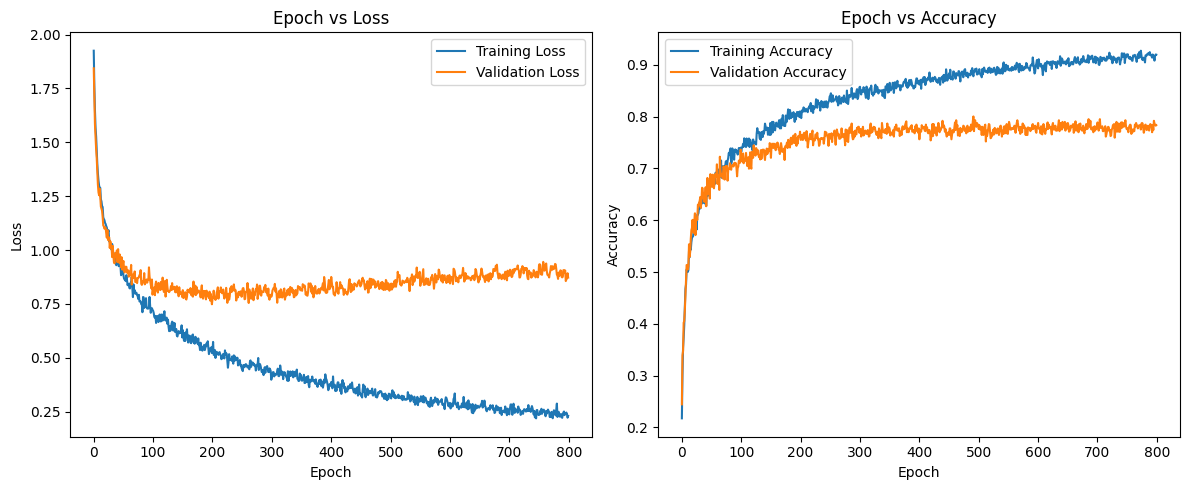

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.81%
Test Accuracy: 75.15%


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


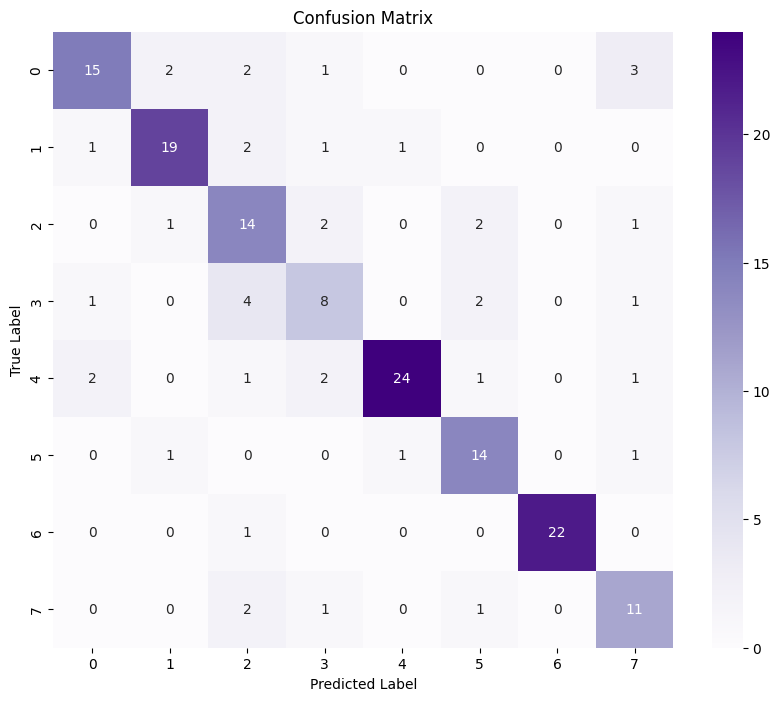

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.83      0.79      0.81        24
           2       0.54      0.70      0.61        20
           3       0.53      0.50      0.52        16
           4       0.92      0.77      0.84        31
           5       0.70      0.82      0.76        17
           6       1.00      0.96      0.98        23
           7       0.61      0.73      0.67        15

    accuracy                           0.75       169
   macro avg       0.74      0.74      0.74       169
weighted avg       0.77      0.75      0.76       169



In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)


In [21]:
model.save('small.h5')